In [1]:
import numpy as np
from io_utils import loadGraph, permuteNoiseMat, writeEdgesToFile

A = loadGraph('facebook/0.edges', 'u')

B = permuteNoiseMat(A,is_perm=False, has_noise=True)

writeEdgesToFile('metadata/B.edges', B)

In [2]:
from attr_utils import *

attributesA = getUndirAttribute('facebook/0.edges')
with open('metadata/attributesA', 'w') as f:
    for index, row in attributesA.iterrows():
        f.write(str(attributesA.ix[index]))

attributesB = getUndirAttribute('metadata/B.edges')
with open('metadata/attributesB', 'w') as f:
    for index, row in attributesB.iterrows():
        f.write(str(attributesB.ix[index]))

In [3]:
from lsh_utils import *

combineAB = selectAndCombine(attributesA, attributesB)

bandDeg = ['Degree','PageRank']
bucketDeg = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandDeg), 20)
with open('metadata/buckets-band-1', 'w') as f:
    for k, v in bucketDeg.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketDeg.items())

bandEdge = ['NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
bucketEdge = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandEdge), 20)
with open('metadata/buckets-band-2', 'w') as f:
    for k, v in bucketEdge.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketEdge.items())

bandAll = ['Degree','PageRank', 'NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
bucketAll = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandAll), 20)
print len(bucketAll.items())

buckets = [bucketDeg, bucketEdge]

/Users/shengjiepan/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


8
9
29


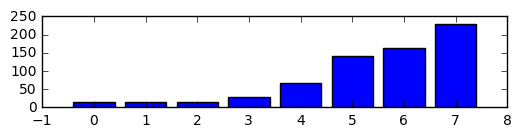

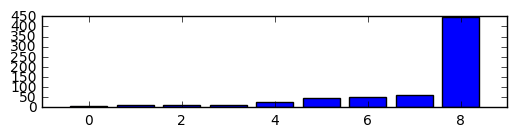

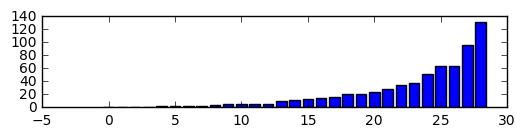

In [4]:
pair_count_dict = combineBucketsBySum(buckets, combineAB, 'facebook/0.edges')
            
import matplotlib.pyplot as plt
plt.subplot(311)
plotBucketDistribution(bucketDeg)
plt.subplot(313)
plotBucketDistribution(bucketEdge)
plt.subplot(313)
plotBucketDistribution(bucketAll)
plt.show()

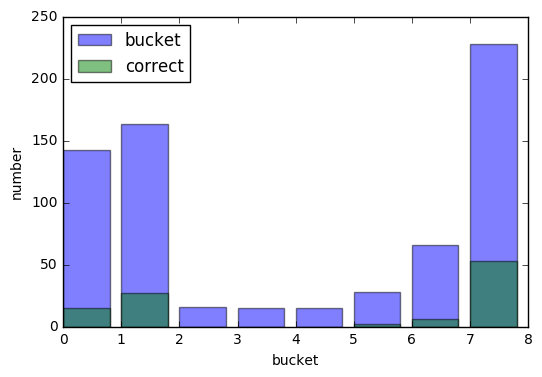

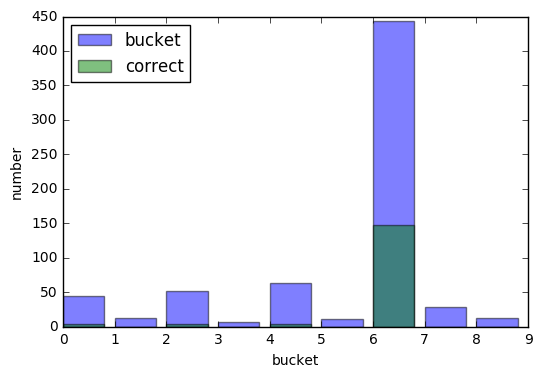

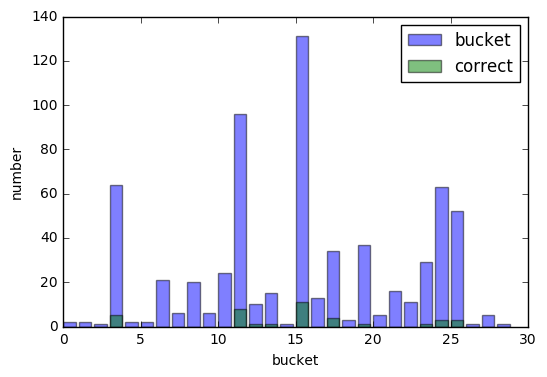

In [5]:
# plot cosine bucket correctness
def plotCorrectness(d, n):
    correct = {}
    for v, k in d.items():
        cnt = 0
        for i in k:
            if (i < n):
                if (i + n in k):
                    cnt += 1
            else:
                break
        correct[v] = cnt
    plt.clf
    plt.figure()
    plt.bar(range(len(d)), [len(v) for k,v in d.items()], alpha=0.5, label='bucket', color='blue')
    plt.bar(range(len(correct)), [correct[k] for k,v in d.items()], alpha=0.5, label='correct', color='green')
    plt.xlabel('bucket')
    plt.ylabel('number')
    plt.legend(loc='best')
    plt.show()
    
plotCorrectness(bucketDeg, attributesA.shape[0])
plotCorrectness(bucketEdge, attributesA.shape[0])
plotCorrectness(bucketAll, attributesA.shape[0])

In [6]:
matching_matrix = computeMatchingMat(attributesA, attributesB, pair_count_dict)
sim_matrix = computeWholeSimMat(attributesA, attributesB)

In [7]:
show_list = [0, 10, 20, 50]
top_k = 5
for i in show_list:
    print "cos sim top %d for node %d:" %(top_k, attributesA['Id'][i])
    print attributesB['Id'][sim_matrix[i].argsort()[-top_k:]].values
    print "matching top %d for node %d:"%(top_k, attributesA['Id'][i])
    print attributesB['Id'][matching_matrix[i].argsort()[-top_k:]].values


cos sim top 5 for node 236:
[224 211 261 185 236]
matching top 5 for node 236:
[224 211 261 185 236]
cos sim top 5 for node 130:
[133  94 144 136 130]
matching top 5 for node 130:
[133  94 144 251 130]
cos sim top 5 for node 280:
[323 332 304 285 280]
matching top 5 for node 280:
[136  98 113 285 280]
cos sim top 5 for node 119:
[315  40 104 119  25]
matching top 5 for node 119:
[315  40 104 119  25]


In [8]:
bandDeg = ['Degree','PageRank']
bucketDeg = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandDeg), 2)
with open('metadata/euc-buckets-band-1', 'w') as f:
    for k, v in bucketDeg.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketDeg.items())

bandEdge = ['NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
bucketEdge = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandEdge), 2)
with open('metadata/euc-buckets-band-2', 'w') as f:
    for k, v in bucketEdge.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketEdge.items())

bandAll = ['Degree','PageRank', 'NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
bucketAll = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandAll), 2)
print len(bucketAll.items())

22
27
40


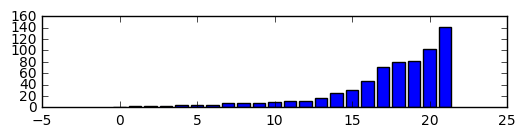

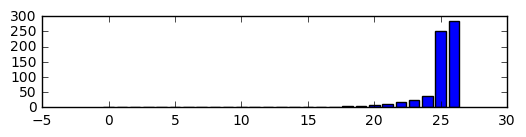

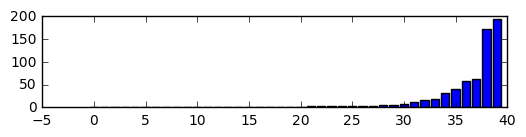

In [9]:
pair_count_dict = combineBucketsBySum(buckets, combineAB, 'facebook/0.edges')
            
import matplotlib.pyplot as plt
plt.subplot(311)
plotBucketDistribution(bucketDeg)
plt.subplot(312)
plotBucketDistribution(bucketEdge)
plt.subplot(313)
plotBucketDistribution(bucketAll)
plt.show()

Degree


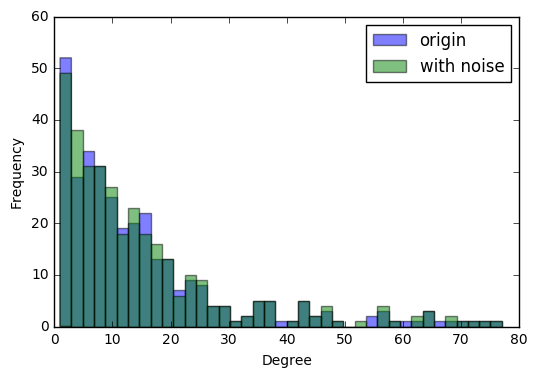

NodeBetweennessCentrality


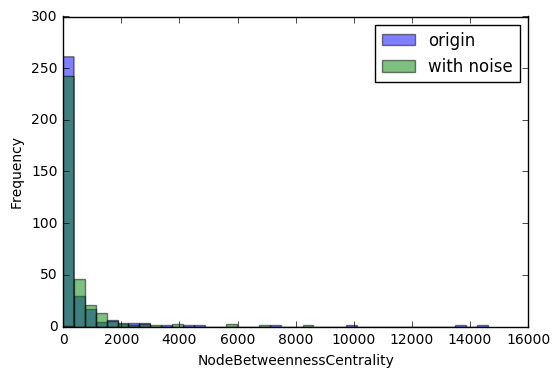

FarnessCentrality


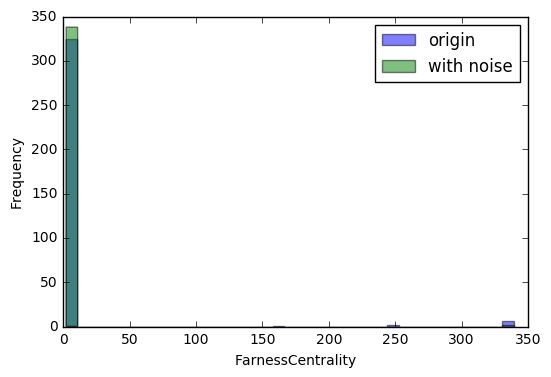

PageRank


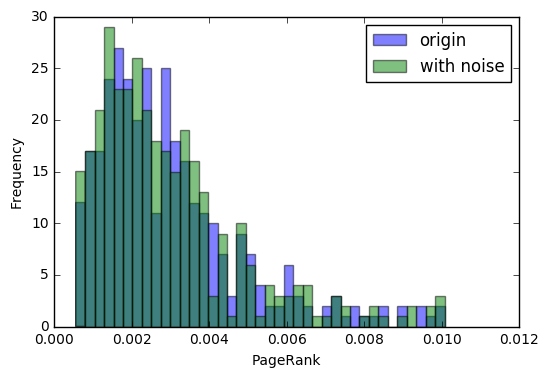

NodeEccentricity


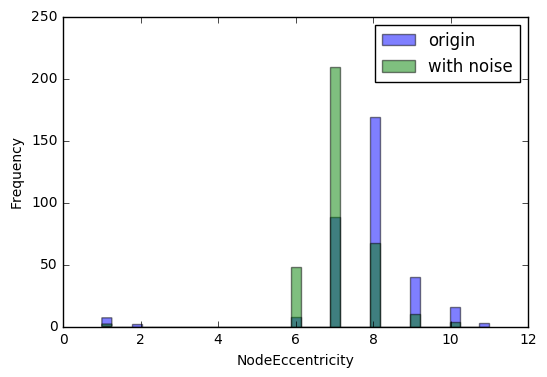

In [10]:
import matplotlib.pyplot as plt

attributes = ['Degree', 'NodeBetweennessCentrality', 
                      'FarnessCentrality', 'PageRank', 'NodeEccentricity']
plt.clf()
for attr in attributes:
    print attr
    plt.figure()
    bins = np.linspace(min(min(attributesA[attr]), min(attributesB[attr])), max(max(attributesA[attr]), max(attributesB[attr])), 40)
    plt.hist(attributesA[attr], bins, alpha=0.5, label='origin')
    plt.hist(attributesB[attr], bins, alpha=0.5, label='with noise')
    plt.xlabel(attr)
    plt.ylabel('Frequency')
    plt.legend(loc='best')
    plt.show()

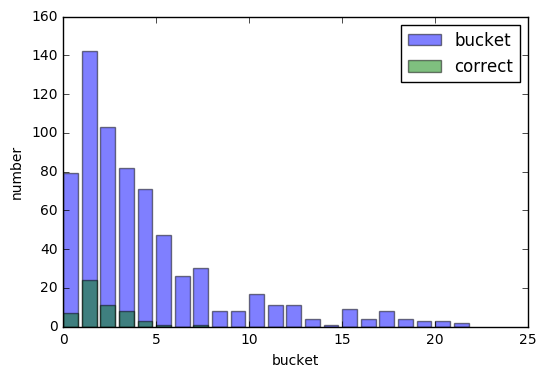

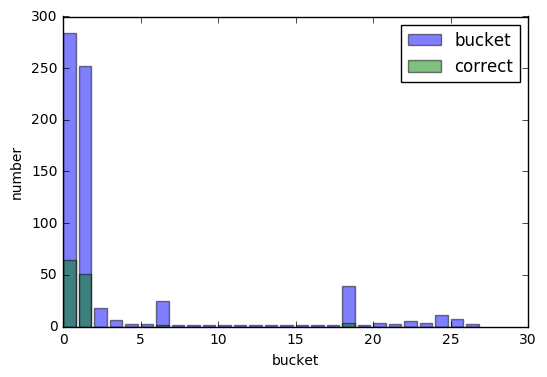

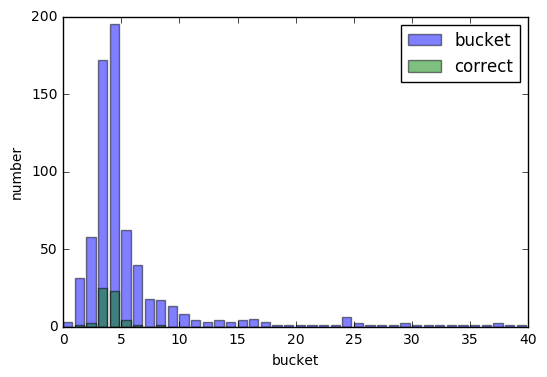

In [11]:
plotCorrectness(bucketDeg, attributesA.shape[0])
plotCorrectness(bucketEdge, attributesA.shape[0])
plotCorrectness(bucketAll, attributesA.shape[0])

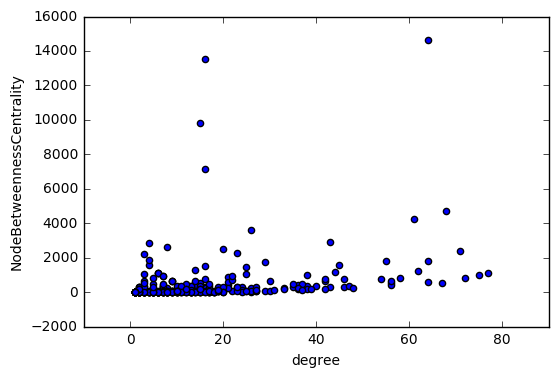

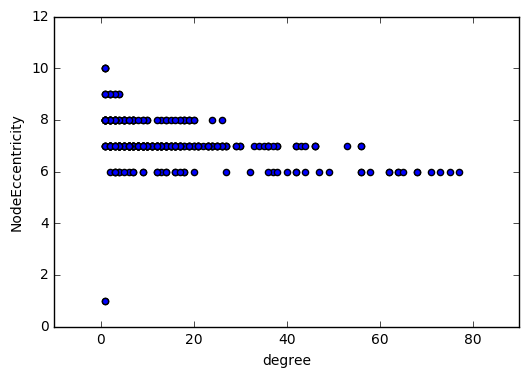

In [25]:
plt.clf()
plt.scatter(attributesA['Degree'], attributesA['NodeBetweennessCentrality'])
plt.xlabel('degree')
plt.ylabel('NodeBetweennessCentrality')
plt.show()
plt.scatter(attributesB['Degree'], attributesB['NodeEccentricity'])
plt.xlabel('degree')
plt.ylabel('NodeEccentricity')
plt.show()